In [19]:
print ("Queen Imoh 7072CEM Coursework")

Queen Imoh 7072CEM Coursework


In [20]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [11]:
# Dataset Introduction and Preparation

import pandas as pd
red = pd.read_csv("winequality-red.csv", sep=";")
white = pd.read_csv("winequality-white.csv", sep=";")

# Add wine type column
red["wine_type"] = "red"
white["wine_type"] = "white"

# Check shapes before cleaning
print("Raw red shape:", red.shape)
print("Raw white shape:", white.shape)

# Remove completely empty rows
red = red.dropna(how="all")
white = white.dropna(how="all")

# Combine datasets
wine = pd.concat([red, white], axis=0, ignore_index=True)
print("Combined shape BEFORE cleaning:", wine.shape)

# Create binary quality label
wine["quality_label"] = (wine["quality"] >= 6).astype(int)

# Show first 10 rows 
wine.head(10)

Raw red shape: (1599, 13)
Raw white shape: (4898, 13)
Combined shape BEFORE cleaning: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,0


In [8]:
# Data Wrangling
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.633061
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.482007
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


               Count  Percentage
quality_label                   
1               4113   63.306141
0               2384   36.693859
FINAL DATASET SUMMARY
Final shape (instances, columns): (6497, 14)
Number of Good wine: 4113
Number of Bad wine: 2384


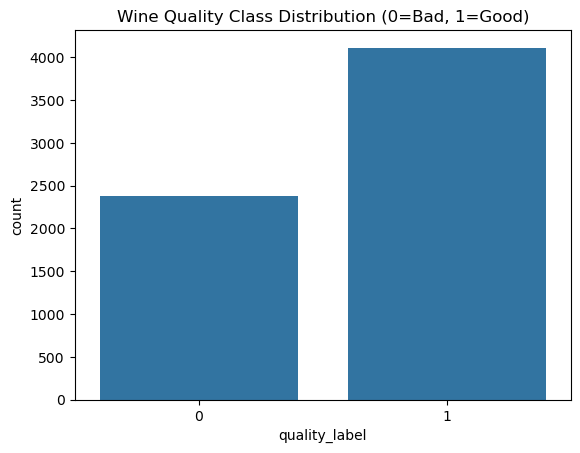

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count Good and Bad Wine
distribution = wine['quality_label'].value_counts()
percentage = wine['quality_label'].value_counts(normalize=True) * 100

# Distribution Table
dist_table = pd.DataFrame({
    'Count': distribution,
    'Percentage': percentage
})
print(dist_table)

print("FINAL DATASET SUMMARY")
print("Final shape (instances, columns):", wine.shape)
print("Number of Good wine:", wine["quality_label"].value_counts()[1])
print("Number of Bad wine:", wine["quality_label"].value_counts()[0])

# Bar plot
sns.countplot(data=wine, x='quality_label')
plt.title('Wine Quality Class Distribution (0=Bad, 1=Good)')
plt.show()

In [13]:
# Model Training and Testing
# Applying stratified split for training and testing the models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Features (all columns except quality and quality_label)
X = wine.drop(['quality', 'quality_label'], axis=1)

# Target variable (binary)
y = wine['quality_label']

# Check if 'wine_type' column exists and convert it to numeric
if 'wine_type' in X.columns:
    X = pd.get_dummies(X, columns=['wine_type'], drop_first=True)

# Train/Test split (stratified train and test) 
# To ensure that my evaluation reflects the original distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale numeric features
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Class distribution before modeling:
quality_label
1    4113
0    2384
Name: count, dtype: int64
Class distribution BEFORE balancing (Training Set):
Class 1: 2879 instances
Class 0: 1668 instances
Class distribution AFTER SMOTE (KNN Training Set):
Class 1: 2879 instances
Class 0: 2879 instances


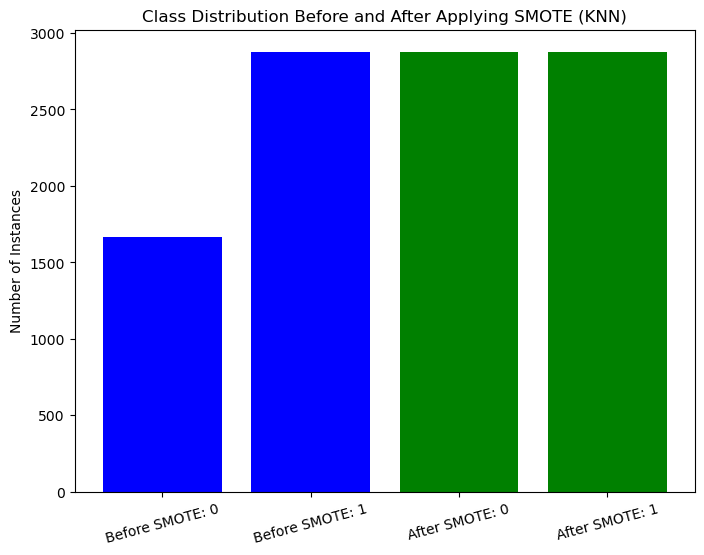

In [16]:
import matplotlib.pyplot as plt
# Apply SMOTE to the training dataset of KNN to address class imbalance by generating synthetic samples of the minority class
from imblearn.over_sampling import SMOTE
from collections import Counter

# Show class distribution before modeling
print("Class distribution before modeling:")
print(wine["quality_label"].value_counts())

# Show class distribution BEFORE balancing
print("Class distribution BEFORE balancing (Training Set):")
train_counts = Counter(y_train)
for cls, count in train_counts.items():
    print(f"Class {cls}: {count} instances")

# Address imbalance using SMOTE for KNN model
smote = SMOTE(random_state=42)
X_train_knn, y_train_knn = smote.fit_resample(X_train, y_train)

# Show class distribution AFTER SMOTE 
print("Class distribution AFTER SMOTE (KNN Training Set):")
smote_counts = Counter(y_train_knn)
for cls, count in smote_counts.items():
    print(f"Class {cls}: {count} instances")

# Counts
counts = [train_counts[0], train_counts[1], smote_counts[0], smote_counts[1]]
labels = ['Before SMOTE: 0', 'Before SMOTE: 1', 'After SMOTE: 0', 'After SMOTE: 1']
colors = ['blue', 'blue', 'green', 'green']

plt.figure(figsize=(8,6))
plt.bar(labels, counts, color=colors)
plt.ylabel("Number of Instances")
plt.title("Class Distribution Before and After Applying SMOTE (KNN)")
plt.xticks(rotation=15)
plt.show()

--- Logistic Regression ---
Accuracy: 0.7303
Precision: 0.8212
Recall: 0.7334
F1 Score: 0.7748
ROC AUC: 0.7955540414512463
Confusion Matrix:
[[519 197]
 [329 905]]


--- KNN ---
Accuracy: 0.7308
Precision: 0.8298
Recall: 0.7229
F1 Score: 0.7726
ROC AUC: 0.7992069438533904
Confusion Matrix:
[[533 183]
 [342 892]]


--- Decision Tree ---
Accuracy: 0.7477
Precision: 0.7930
Recall: 0.8136
F1 Score: 0.8032
ROC AUC: 0.7238462374256405
Confusion Matrix:
[[ 454  262]
 [ 230 1004]]




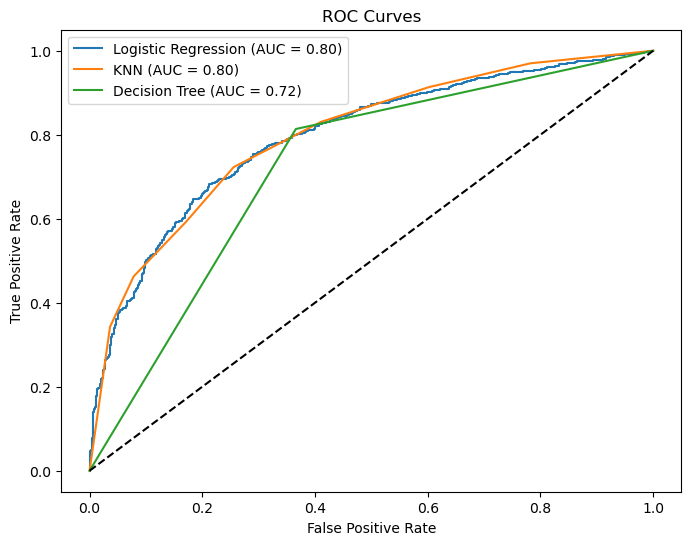

In [21]:
# Evaluation of the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    cm = confusion_matrix(y_test, y_pred)
    
    return acc, prec, rec, f1, roc, cm
    
# Adressing class imbalance of logistic regression and Decision Tree using class weight to give more significance to the minority class without altering
#the original dataset
# Logistic Regression with class weight 
log_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_metrics = evaluate_model(log_model, X_test, y_test)

# KNN (trained on SMOTE-resampled data) ---
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_knn, y_train_knn)
knn_metrics = evaluate_model(knn_model, X_test, y_test)

# Decision Tree with class weight
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=None, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)
dt_metrics = evaluate_model(dt_model, X_test, y_test)

# --- Print Results ---
models = ['Logistic Regression', 'KNN', 'Decision Tree']
metrics = [log_metrics, knn_metrics, dt_metrics]

for name, met in zip(models, metrics):
    acc, prec, rec, f1, roc, cm = met
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc if roc!='N/A' else 'N/A'}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

# ROC Curves 
plt.figure(figsize=(8,6))
for model, label in zip([log_model, knn_model, dt_model], models):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

Top 10 Feature Importances:
alcohol                 0.229165
volatile acidity        0.145058
residual sugar          0.082425
total sulfur dioxide    0.079772
sulphates               0.079550
pH                      0.078208
chlorides               0.070716
citric acid             0.065118
free sulfur dioxide     0.063266
density                 0.059376
dtype: float64


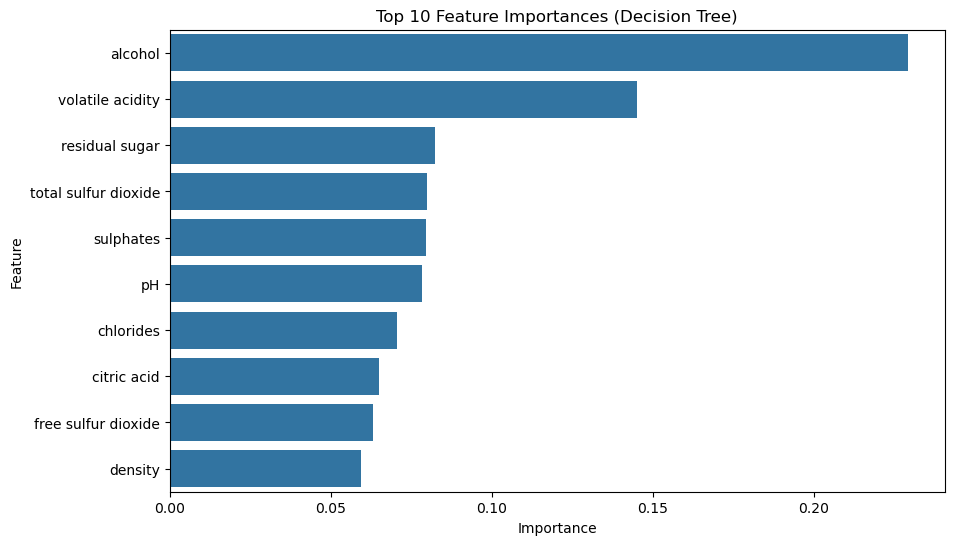

In [18]:
# Feature Importances for Decision Tree
feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print("Top 10 Feature Importances:")
print(feat_importances.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:10], y=feat_importances[:10].index)
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()